<a href="https://colab.research.google.com/github/ayman-jamal/Titanic-model/blob/master/Titanic_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titanic project


# New Section

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
upload = files.upload()
titanic_train= pd.read_csv('titanic_train.csv')

Saving titanic_train.csv to titanic_train (3).csv


In [ ]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_train['Survived'].unique()

array([0, 1])

In [ ]:
titanic_train['Pclass'].unique()

array([3, 1, 2])

In [ ]:
titanic_train['Age'].isnull().sum()

177

In [ ]:
print(titanic_train['Age'].isnull().sum()) # it is a small of nulls value which we can deal with it with one of the ways that we learned  
print(titanic_train['Cabin'].isnull().sum()) # it is bigger than that we can fill it .. frequently we'll drop it

177
687


**The main gool for this model is ''Who will survive the best?'. So, I will look at the distribution of each variable around a variable called Survive.**

---



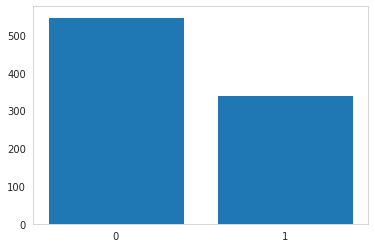

In [ ]:
x1 = titanic_train[titanic_train['Survived']==0 ].count()[1]
x2 = titanic_train[titanic_train['Survived']==1].count()[1]
labels = ['0','1']
x0=[x1,x2]
plt.bar(labels,x0)
plt.grid()
plt.show()

In [ ]:
 titanic_train[(titanic_train['Survived']==0 )& (titanic_train['Sex']=='male')].count()[1]

468

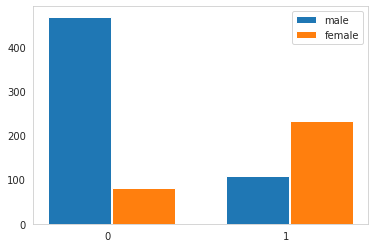

In [ ]:
x1 = titanic_train[(titanic_train['Survived']==0 )& (titanic_train['Sex']=='male')].count()[1]
x2 = titanic_train[(titanic_train['Survived']==1 )& (titanic_train['Sex']=='male')].count()[1]
labels = ['0','1']
x0=[x1,x2]
x11 = titanic_train[(titanic_train['Survived']==0 )& (titanic_train['Sex']=='female') ].count()[1]
x22 = titanic_train[(titanic_train['Survived']==1 )& (titanic_train['Sex']=='female')].count()[1]
x00=[x11,x22]

bar1 = np.arange(len(labels))
plt.bar(bar1-0.16,x0,width=0.35,label='male')
plt.bar(bar1+0.2,x00,width=0.35,label='female')
plt.xticks(bar1,labels)
plt.grid()
plt.legend()
plt.show()

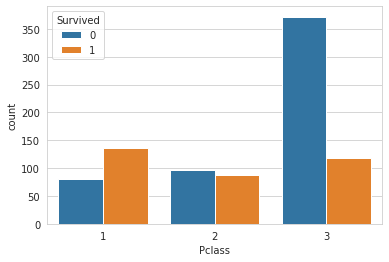

In [ ]:
sns.set_style('whitegrid')
sns.countplot(hue='Survived',x='Pclass',data=titanic_train)

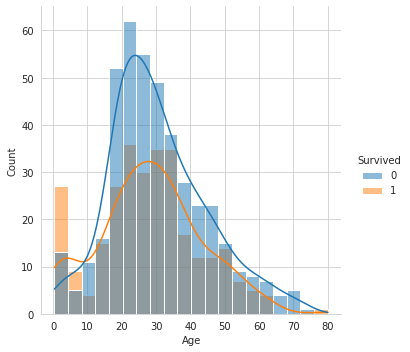

In [ ]:
sns.displot(titanic_train, x="Age", hue="Survived", kde=True)


In [ ]:
import missingno as msno

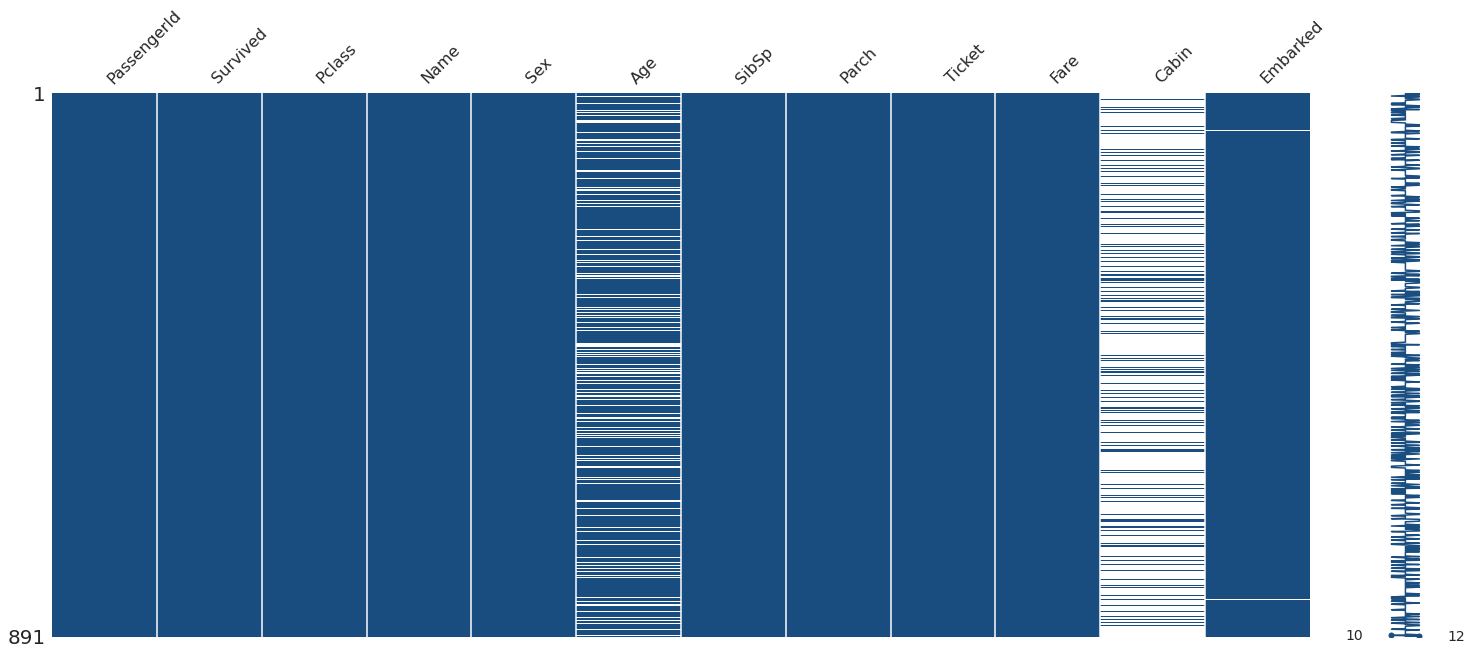

In [ ]:
msno.matrix(titanic_train,color= (0.1, 0.3, 0.5))



**now, we'll fill the null cell with the mean that are suitable with its category**

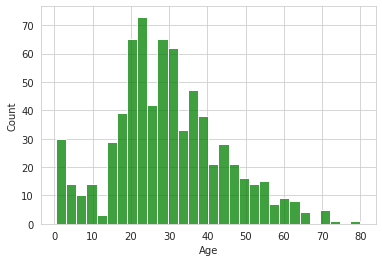

In [ ]:
sns.histplot(data=titanic_train,x=titanic_train['Age'],color='green',bins=30)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


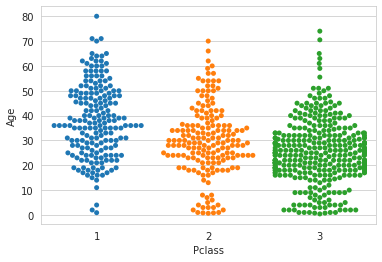

In [ ]:
sns.swarmplot(data=titanic_train,x='Pclass',y='Age')


**where there is a classes for a tickts ,So i guiss each class has it's mean which is different..**

In [ ]:
i = 0
for x in titanic_train['Age']:
  if pd.isnull(x):
    if titanic_train.loc[i,'Pclass']==1:
      titanic_train.loc[i,'Age'] = titanic_train[titanic_train['Pclass']==1].mean()[3]

    elif titanic_train.loc[i,'Pclass']==2:
     titanic_train.loc[i,'Age'] = titanic_train[titanic_train['Pclass']==2].mean()[3]

    elif titanic_train.loc[i,'Pclass']==3:
      titanic_train.loc[i,'Age'] = titanic_train[titanic_train['Pclass']==3].mean()[3]
  i += 1 
  

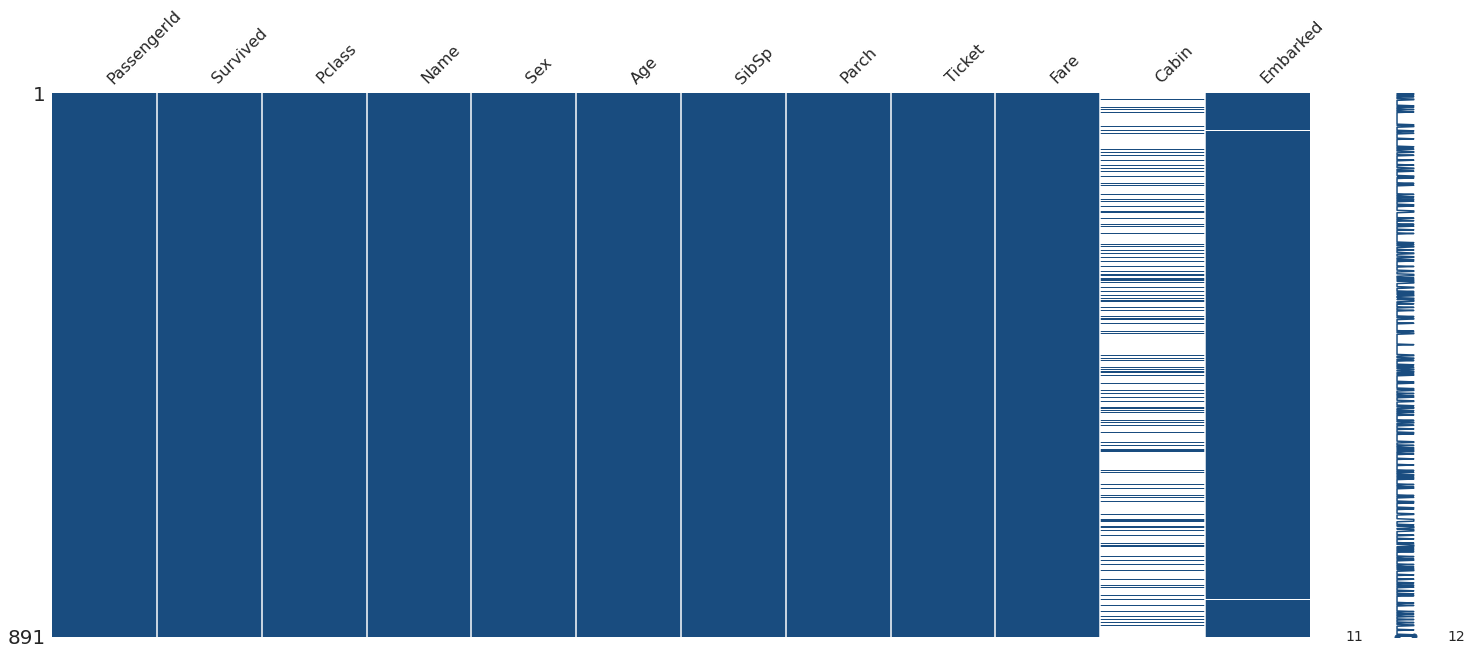

In [ ]:
msno.matrix(titanic_train,color= (0.1, 0.3, 0.5))



In [ ]:
titanic_train.drop(['Cabin'],axis=1,inplace=True)

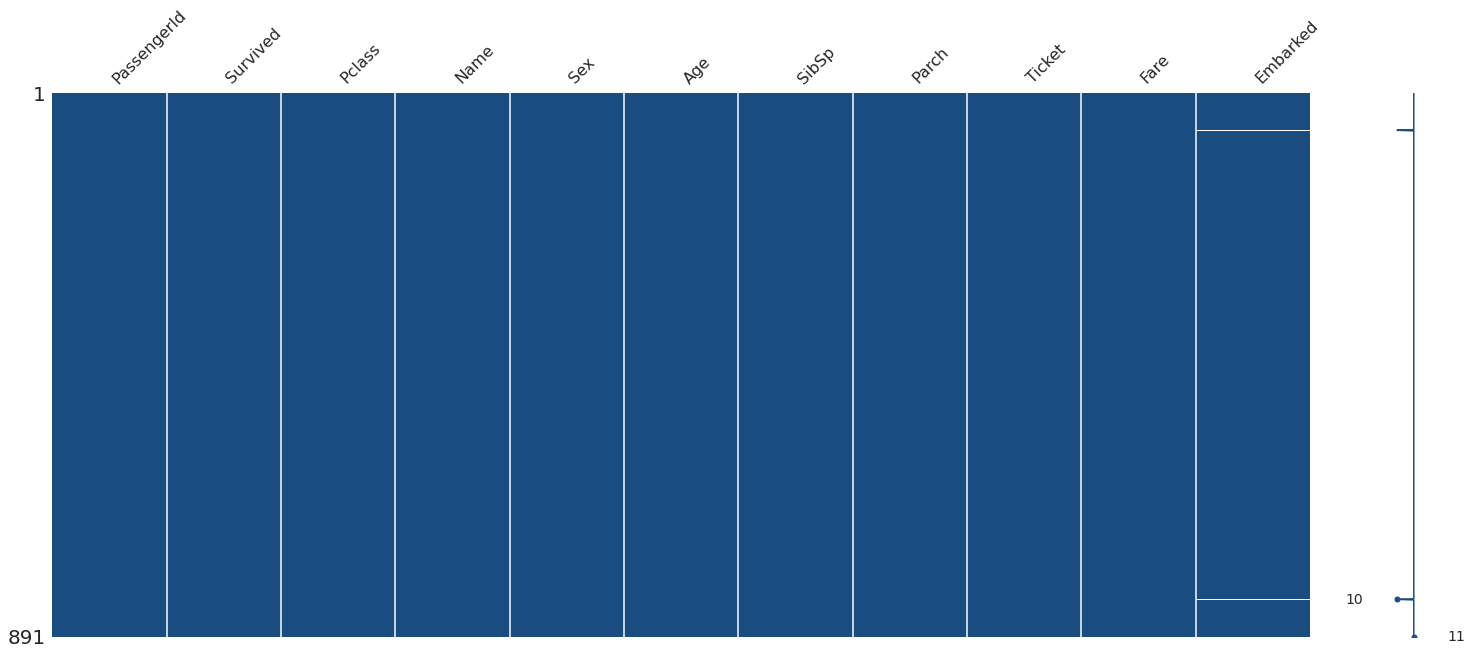

In [ ]:
msno.matrix(titanic_train,color= (0.1, 0.3, 0.5))




In [ ]:
titanic_train.dropna(inplace=True)

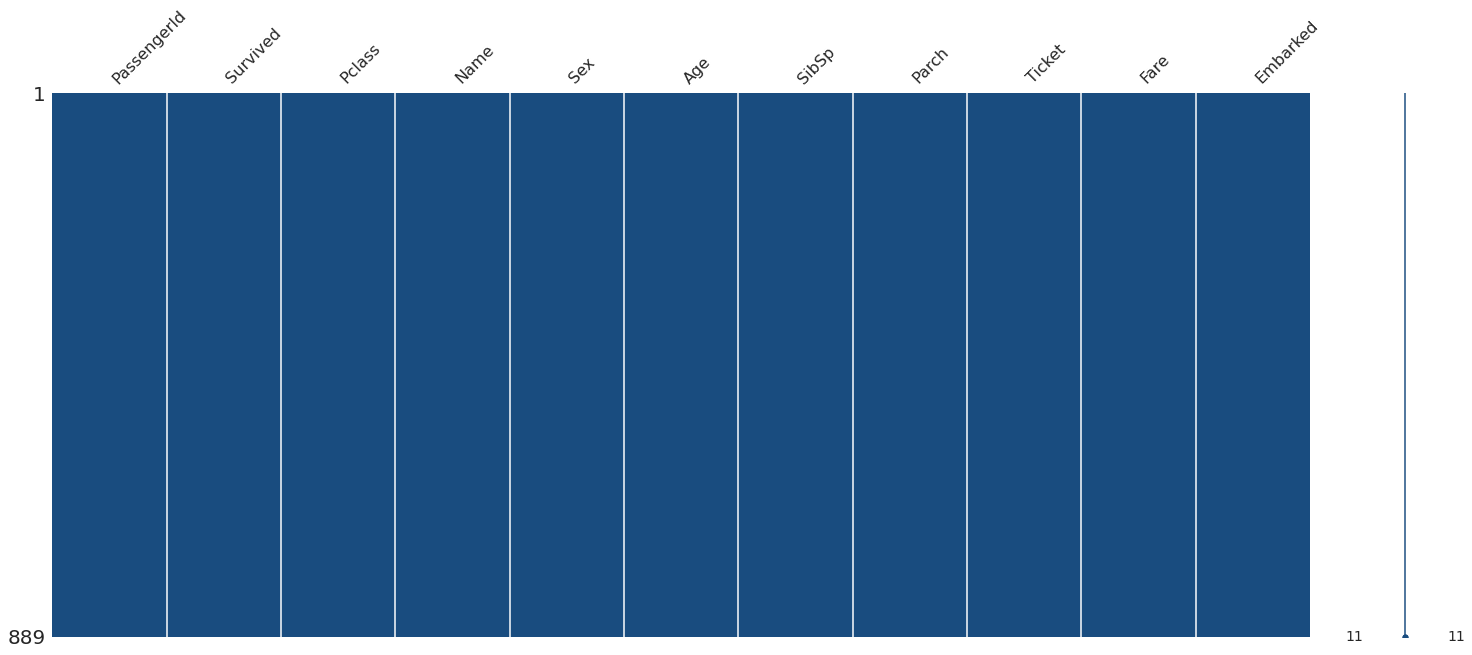

In [ ]:
msno.matrix(titanic_train,color= (0.1, 0.3, 0.5))



# New Section

In [ ]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
titanic_cat = titanic_train[['Sex']]


In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
titanic_cat_1hot = cat_encoder.fit_transform(titanic_cat)

titanic_cat_1hot

<889x2 sparse matrix of type '<class 'numpy.float64'>'
	with 889 stored elements in Compressed Sparse Row format>

In [ ]:
titanic_cat_1hot = titanic_cat_1hot.toarray()
titanic_cat_1hot

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [ ]:
cat_encoder.categories_

[array(['female', 'male'], dtype=object)]

In [ ]:
sex_male = titanic_cat_1hot[:,1]
titanic_train['sex_male'] = sex_male

In [ ]:
titanic_train.drop(['Sex'],axis=1,inplace=True)

In [ ]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,0.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,1.0


In [ ]:
Embarked_cat = titanic_train[['Embarked']]

In [ ]:
Embarked_encoder = OneHotEncoder()
Embarked_cat_1hot = Embarked_encoder.fit_transform(Embarked_cat)
Embarked_cat_1hot

<889x3 sparse matrix of type '<class 'numpy.float64'>'
	with 889 stored elements in Compressed Sparse Row format>

In [ ]:
Embarked_cat_1hot = Embarked_cat_1hot.toarray()

In [ ]:
Embarked_encoder.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [ ]:
Q = Embarked_cat_1hot[0:,1]
S = Embarked_cat_1hot[0:,2]

In [ ]:
titanic_train['Q'] = Q
titanic_train['S'] = S
titanic_train.drop(['Embarked'],axis=1,inplace=True)

In [ ]:
titanic_train.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [ ]:
titanic_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,sex_male,Q,S
0,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


**Training and predicting**

In [ ]:
from sklearn.model_selection import train_test_split
Survived = titanic_train['Survived']
titanic_train_split = titanic_train.drop('Survived',axis=1)
X_TRAIN,x_test,Y_TRAIN,y_test = train_test_split(titanic_train_split,Survived,test_size= 0.25,random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_TRAIN,Y_TRAIN)

In [ ]:
Prediction = logmodel.predict(x_test)

**Evaluation**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,y_pred=Prediction))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       136
           1       0.87      0.68      0.76        87

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.83      0.83       223



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_TRAIN,Y_TRAIN)
knn_prediction = knn.predict(x_test)

print(classification_report(y_true=y_test,y_pred=knn_prediction))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       136
           1       0.65      0.62      0.64        87

    accuracy                           0.72       223
   macro avg       0.71      0.70      0.71       223
weighted avg       0.72      0.72      0.72       223



In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_TRAIN,Y_TRAIN)

tree_predictions = tree.predict(x_test)


print(classification_report(y_test, tree_predictions))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       136
           1       0.68      0.68      0.68        87

    accuracy                           0.75       223
   macro avg       0.74      0.74      0.74       223
weighted avg       0.75      0.75      0.75       223



In [ ]:
print(tree.predict(x_test[:10]))
print(y_test[:10])


[0 0 1 1 0 0 1 0 0 1]
511    0
613    0
615    1
337    1
718    0
152    0
826    0
418    0
614    0
241    1
Name: Survived, dtype: int64
